### Import librabries

In [1]:
import numpy as np
import pandas as pd
data=pd.read_excel('service-data.xlsx',index_col=None,
                   parse_cols=None,date_parser=True)
data.head()

,Invoice_Date,JobCardDate,BusinessPartnerName,VehicleNo.,VehicleModel,CurrentKMReading,INVOICELINETEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


#### Drop all unnecessary label columns

In [2]:
data.drop(['JobCardDate','BusinessPartnerName','CurrentKMReading','VehicleModel','VehicleNo.'],axis=1,inplace=True)

In [3]:
data.head()

,Invoice_Date,INVOICELINETEXT
0,2017-05-30,ENGINE OIL
1,2017-06-02,ENGINE OIL
2,2017-06-02,POLISH
3,2017-06-02,CONSUMABLES
4,2017-06-02,COOLANT OIL


### Time and frequency base weekly data analyse

#### calculate all the null values

In [4]:
data.isnull().sum()

Invoice_Date        0
INVOICELINETEXT    34
dtype: int64

#### Drop null values

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Invoice_Date       0
INVOICELINETEXT    0
dtype: int64

#### Use groupby for slipting data into group and use count function to count the spare parts which were used in 2018

In [7]:
data['count']=data.groupby('INVOICELINETEXT')['Invoice_Date'].transform('size')

In [8]:
data["year"]= pd.to_datetime(data["Invoice_Date"]).dt.year 

#### Took data of 2018 

In [9]:
data=data.loc[data['year']==2018]

In [10]:
print(data.shape)
data.head()

(19558, 4)


,Invoice_Date,INVOICELINETEXT,count,year
8368,2018-01-03,BRAKE CABLE,24,2018
8369,2018-01-03,ENGINE OIL,3802,2018
8370,2018-01-03,BATTERY,83,2018
8371,2018-01-03,LOCK ARM,43,2018
8372,2018-01-03,GENERAL SERVICE,2142,2018


In [11]:
data.set_index(['Invoice_Date'],inplace=True)

In [12]:
data.drop_duplicates(subset=['INVOICELINETEXT','count'],keep='first',inplace=True)

In [13]:
data.inplace=True

In [14]:
#from datetime import datetime 
#data.sort_index(ascending=True,inplace=True)

In [15]:
data.drop(['year'],axis=1,inplace=True)

#### Use ABC classification for creating three classes which shows the quantity on percentage basis

In [16]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A, B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [17]:
data['Rumsumcount']=data['count'].cumsum()

In [18]:
data['totsum']=data['count'].sum()

In [19]:
data['runper']=data['Rumsumcount']/data['totsum']

In [20]:
data['Class']=data['runper'].apply(ABC_segmentation)

#### So here 60% spare is under A, 25% under B,15% under C

In [21]:
data.Class.value_counts()

C    356
B     53
A     27
Name: Class, dtype: int64

In [22]:
data.head()

,INVOICELINETEXT,count,Rumsumcount,totsum,runper,Class
Invoice_Date,,,,,,
2018-01-03,BRAKE CABLE,24,24,28279,0.000849,A
2018-01-03,ENGINE OIL,3802,3826,28279,0.135295,A
2018-01-03,BATTERY,83,3909,28279,0.138230,A
2018-01-03,LOCK ARM,43,3952,28279,0.139750,A
2018-01-03,GENERAL SERVICE,2142,6094,28279,0.215496,A


#### Merge invoicelinetext, count, & class

In [23]:
data['service']=data['INVOICELINETEXT']+' '+data['count'].map(str)+' '+data['Class'].map(str)

In [24]:
## print(data.groupby('INVOICELINETEXT').size())

In [25]:
data.head()

,INVOICELINETEXT,count,Rumsumcount,totsum,runper,Class,service
Invoice_Date,,,,,,,
2018-01-03,BRAKE CABLE,24,24,28279,0.000849,A,BRAKE CABLE 24 A
2018-01-03,ENGINE OIL,3802,3826,28279,0.135295,A,ENGINE OIL 3802 A
2018-01-03,BATTERY,83,3909,28279,0.138230,A,BATTERY 83 A
2018-01-03,LOCK ARM,43,3952,28279,0.139750,A,LOCK ARM 43 A
2018-01-03,GENERAL SERVICE,2142,6094,28279,0.215496,A,GENERAL SERVICE 2142 A


In [26]:
data.drop(['INVOICELINETEXT','count','Rumsumcount','totsum','runper','Class'],axis=1,inplace=True)

In [27]:
print(data.shape)
data.head()

(436, 1)


,service
Invoice_Date,
2018-01-03,BRAKE CABLE 24 A
2018-01-03,ENGINE OIL 3802 A
2018-01-03,BATTERY 83 A
2018-01-03,LOCK ARM 43 A
2018-01-03,GENERAL SERVICE 2142 A


#### Apply label encoding to service

In [28]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data.service=la.fit_transform(data.service)

In [29]:
data.head()

,service
Invoice_Date,
2018-01-03,28
2018-01-03,122
2018-01-03,14
2018-01-03,238
2018-01-03,174


In [30]:
from matplotlib import pyplot
pyplot.plot(data)
pyplot.show()

C:\Users\SHADAB\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 1 Axes>

## Apply ARIMA Model

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(5,1,1))
model_fit = model.fit(disp=1)
print(model_fit.summary())
pyplot.show()

C:\Users\SHADAB\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\SHADAB\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.service   No. Observations:                  435
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2722.773
Method:                       css-mle   S.D. of innovations            125.645
Date:                Wed, 25 Sep 2019   AIC                           5461.545
Time:                        20:00:10   BIC                           5494.148
Sample:                             1   HQIC                          5474.413
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0401      0.050      0.795      0.427      -0.059       0.139
ar.L1.D.service     0.0507      0.048      1.056      0.292      -0.043       0.145
ar.L2.D.service    -0.0165      

In [32]:
X = data.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))

predicted=229.157420, expected=208.000000


#### Plotting the graph

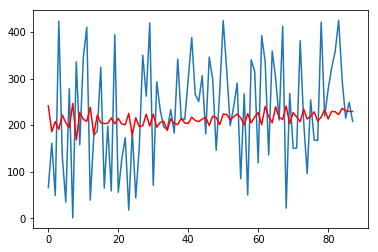

In [33]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()